In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [5]:
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [6]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [7]:
pyber_data_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [8]:
pyber_data_df["city"].value_counts()

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
                   ..
Randallchester      5
Penaborough         5
South Saramouth     4
Newtonview          4
Garzaport           3
Name: city, Length: 120, dtype: int64

In [9]:
#  1. Get the total rides for each city type
rides = pyber_data_df.groupby("type").size()
rides

type
Rural        125
Suburban     625
Urban       1625
dtype: int64

In [10]:
#  2. Get the total drivers for each city type
drivers = city_data_df.groupby("type").driver_count.sum()
drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
#  3. Get the total amount of fares for each city type
fares = pyber_data_df.groupby("type").fare.sum()
fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
#  4. Get the average fare per ride for each city type. 
avg_fare = pyber_data_df.groupby("type").fare.mean()
avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [13]:
# 5. Get the average fare per driver for each city type. 
avg_fare_drivers=fares/drivers
avg_fare_drivers

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([rides, 
                              drivers, 
                              fares, 
                              avg_fare, 
                              avg_fare_drivers],
                              axis=1)

pyber_summary_df.columns = ["Total Rides", "Total Drivers", "Total Fares", "Average Fare Per Ride", "Average Fare Per Driver"]

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [15]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [16]:
#  8. Format the columns.
pyber_summary_df = pd.concat([rides, 
                              drivers, 
                              fares, 
                              avg_fare.round(2), 
                              avg_fare_drivers.round(2)],
                              axis=1)

pyber_summary_df.columns = ["Total Rides", "Total Drivers", "Total Fares", "Average Fare Per Ride", "Average Fare Per Driver"]

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [17]:
#Deliverable 2. Create a multiple line plot that shows the total weekly of the fares for each type of city
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [18]:
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2781340000000,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4256850000000,4,Rural


In [19]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df2 = pyber_data_df.groupby(["date", "type"]).fare.sum()
df2 = pd.DataFrame(df2)
df2

,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
...,...,...
5/8/2019 1:54,Urban,32.69
5/8/2019 2:31,Urban,41.33
5/8/2019 4:20,Urban,21.99


In [20]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df2.reset_index(inplace=True)
df2

,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [21]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df2 = df2.pivot(index='date', columns='type', values='fare' )
df2

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [22]:
    # 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
    # df.index = pd.to_datetime(df.index)
df2.index = pd.to_datetime(df2.index)
df2.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [23]:
type(df2.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [31]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df2 = df2.loc['2019-01-01':'2019-04-28',:]


C:\Users\zdiercks\Anaconda3\lib\site-packages\pandas\core\indexing.py:1109: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


In [32]:
#7 check that the datatype for the index is datetime using df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [41]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df3 = df2.resample("W").sum()
df3

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


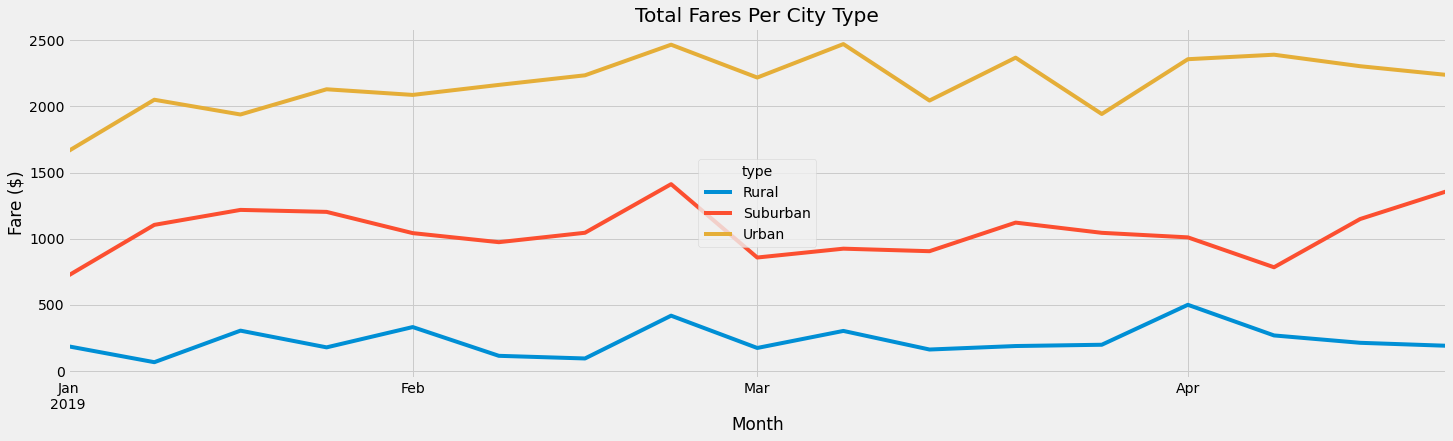

In [42]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df3.plot(kind="line", figsize=(22,6))
plt.title("Total Fares Per City Type")
plt.xlabel("Month")
plt.ylabel("Fare ($)")

plt.savefig("../PyBer_Analysis/PyBer_Challenge.png")
plt.show()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

